In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re
import numpy as np
nlp = spacy.load('en_core_web_lg')
import pickle

In [165]:
dataset_1 = pd.read_csv('../artifacts/useful datasets/data_amazon_review_org.csv')
dataset_2 = pd.read_csv('../artifacts/useful datasets/data_amazon_vfl.csv')
dataset_3 = pd.read_csv('../artifacts/useful datasets/data_sa_out.csv')

In [166]:
dataset_1 = dataset_1.rename(columns={
    'reviewText': 'review'
})
dataset_3 = dataset_3.rename(columns={
    'Summary': 'review'
})


In [167]:
dataset = pd.concat([dataset_1, dataset_2, dataset_3], axis=0, ignore_index=True)

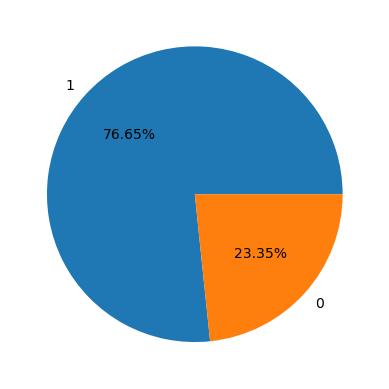

In [168]:
plt.pie(dataset['target'].value_counts(), autopct='%1.2f%%', labels=dataset['target'].value_counts().index)
plt.show()

In [169]:
dataset[dataset['review'].duplicated()].shape

(108786, 2)

In [170]:
dataset.drop_duplicates(subset='review', inplace=True)

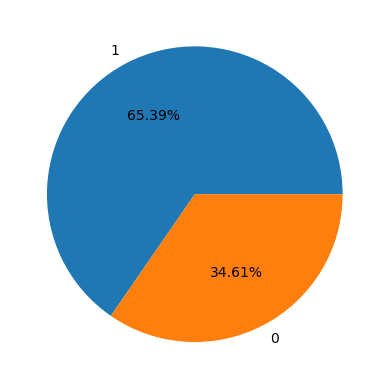

In [171]:
plt.pie(dataset['target'].value_counts(), autopct='%1.2f%%', labels=dataset['target'].value_counts().index)
plt.show()

In [8]:
STOP_WORDS_EDIT= [i for i in STOP_WORDS if i not in ["not", "no", "never", "n't", 'are', 'is', 'was']]

In [10]:
def clear_text(text):
    doc = nlp(str(text))
    clear = ""
    for i in doc:
        if i.like_email or i.like_url or i.is_punct or i.is_currency or i.like_num or i.text in STOP_WORDS_EDIT:
            continue
        i = i.lemma_
        i = i.lower()
        i = re.sub("[^a-zA-Z\s']", '', i)
        clear =clear +  i+" "
    clear = nlp(clear).vector
    return clear 

In [240]:
arr = np.zeros((len(dataset['review']),300))
list_col = [i for i in range(300)]
x = dataset['review'].apply(clear_text)

for i, data in enumerate(x.values):
    arr[i] = data

In [245]:
dataset[list_col] = arr

In [247]:
dataset.to_csv('../artifacts/useful datasets/dataset_vect.csv', index=False)

In [2]:
nlp.to_disk('../artifacts/models/spacy_model')

In [11]:
with open('../artifacts/models/clear_text.pkl', 'wb') as f:
    pickle.dump(clear_text, f)

In [9]:
with open('../artifacts/models/stop_word_edit.pkl', 'wb') as f:
    pickle.dump(STOP_WORDS_EDIT, f)